<img src="figs/blackhole.jpg" width="800px">


A supermassive black hole approximately 55 million light-years from the earth. Its mass is 6.5 billion times larger than that of the sun.

## Imaging a black hole

<img src="figs/blackhole.jpg" width="400px">

### Event Horizon telescope
The Event Horizon telescope is a collection of eight elescopes that together image the universe with unprecedented resolution. It has an angular resolution of 20 micro-arcseconds - enough to read a newspaper in New York from a sidewalk café in Paris.

### Information overload

Each day this telescope generates over 350 terabytes of observations. Postprocessing this data was a huge challenge.

`Numpy` was instrumental for this postprocessing.

Code is available in the `eht-imaging` package.

# Numerical computations with NumPy


## Python is fast to write ...

... but can be slow to run.

In particular, loops over large data structures might be very slow:
```Python
for i in range(len(A)):
    A[i] = ...
```    

## NumPy enables efficient numerical computing in Python

The core of NumPy is well-optimized C code. 

It provides the flexibility of Python with the speed of compiled code.

## Numpy is well worth learning

NumPy is the *de facto* standard in Python, and today even is part of interoperability with other languages (R, Julia, etc.).

It is used in libraries such as Pandas, SciPy, Matplotlib, scikit-learn and scikit-image.

## Contents

* A first taste of NumPy
* Creating arrays
* Indexing/slicing arrays
* Performance considerations
* Plotting

## More info

* The NumPy quickstart (https://docs.scipy.org/doc/numpy/user/quickstart.html)
* Scientific Computing Tools for Python 
  (https://www.scipy.org)
* Scipy Lecture Notes (https://scipy-lectures.org)

## A taste of NumPy

Plot the intensity of the black hole image across a line.

<img src="figs/blackhole.jpg" width="200px">

In [2]:
from PIL import Image

im = Image.open("figs/blackhole.jpg")

# Load pixel data as np array
import numpy as np

data = np.asarray(im, dtype="uint32")

ny, nx = data.shape[:2]  # number of pixels in x and y direction

print(f"Shape = {nx, ny}")

data[0][:3]

Shape = (1600, 932)


array([[11,  5,  5],
       [11,  5,  5],
       [11,  5,  5]], dtype=uint32)

## Compute intensity

The data array gives the RGB tuple of each pixel.

<img src="figs/RGB.png" width="200px">

In [3]:
# Get pixel values along x-axis centerline
line_pixels = data[:][ny // 2]

red = line_pixels[:, 0]
blue = line_pixels[:, 1]
green = line_pixels[:, 2]

# compute intensity by squaring RGB values
intensity = (red**2 + blue**2 + green**2) ** 0.5

Then plot!

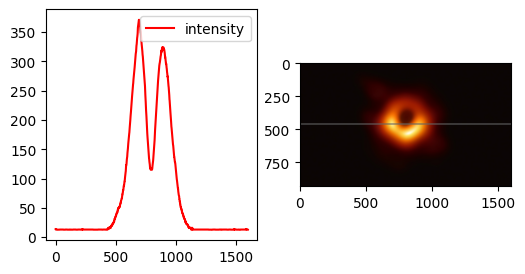

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].plot(intensity, color="red", label="intensity")
axs[0].legend()

# visualize line in image
im_copy = im.copy()

line_thickness, line_color = 4, (100, 100, 100)

for i in range(0, nx):
    for j in range(-line_thickness, line_thickness):
        im_copy.putpixel((i, ny // 2 + j), line_color)

axs[1].imshow(im_copy)

# Numpy arrays


The most basic array type that NumPy provides is `ndarray`. These are N-dimensional homogenous collections of "items" of the same type.

```python
np.array([5., 10., 11.])
np.array(["a", "b", "c"])
```

**Properties**:

1. Arrays have a fixed size.
2. Arrays have one associated data type. 
3. *Contents* of arrays are mutable (values in array can be changed)

## Creating NumPy arrays

Numpy provides convenience functions for creating common arrays:

In [5]:
np.zeros(3)

array([0., 0., 0.])

In [6]:
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

In [7]:
np.empty((2, 2))  # uninitialised array. Might contain arbitrary data

array([[263.76136364, 169.19026199],
       [290.01136364, 183.19026199]])

## Array with a sequence of numbers


### linspace
`linspace(a, b, n)` generates `n` uniformly spaced
coordinates, starting with `a` and ending with `b`

<img src="figs/numpy-linspace.png" style="width: 500px;"/>

Use `endpoint=False` to exclude the last point (matches `range(start, stop)`)

In [8]:
np.linspace(-3, 2, num=5)

array([-3.  , -1.75, -0.5 ,  0.75,  2.  ])

In [9]:
np.linspace(-3, 2, num=5, endpoint=False)

array([-3., -2., -1.,  0.,  1.])

## arange

`arange` is the numpy equivalent of Python's `range`

In [10]:
np.arange(-5, 6, step=2, dtype=float)

array([-5., -3., -1.,  1.,  3.,  5.])

### Warning: `arange` can give unexpected results

`arange`'s upper limit may or may not be included!

### Demonstration

Let's compare

In [11]:
np.arange(8.2, 8.2 + 0.05, 0.05)  # OK!

array([8.2 , 8.25])

with this one:

In [12]:
np.arange(8.2, 8.2 + 0.1, 0.05)  # Not OK?

array([8.2 , 8.25])

**What is happening?**

**Reason**: An accumulated round-off error in the second case:

In [13]:
8.2 + 0.05

8.25

In [14]:
8.2 + 0.1

8.299999999999999

# Array attributes

Given an array `a`, you have access to some useful attributes:

|Attribute|Description|
|--|-------------------------------|
|*a.data* |Buffer to raw data|
|*a.dtype*|Type information of data|
|*a.ndim* |Number of dimensions|
|*a.shape*|Tuple representing rank of array in each direction|
|*a.size* |Total number of elements|
|*a.nbytes* |Total number of bytes allocated for array|

**Example**: given an array a, make a new array `x` of same dimension and data type:

In [15]:
A = np.array([[1, 2], [3, 4]])

np.zeros(A.shape, A.dtype)

array([[0, 0],
       [0, 0]])

In [16]:
np.zeros_like(A)

array([[0, 0],
       [0, 0]])

## dtypes: the type of the arrays elements

Use the `dtype` argument to create an array of a specific type:
```python
np.zeros(3, dtype=np.int)       # integer datatype
np.ones(3, dtype=np.float32)    # single precision
np.ones(3, dtype=np.float64)    # double precision
np.array(3, dtype=np.complex)   # complex numbers
```
A full list of valid types can be found [here: https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## **By default**, numpy arrays will automatically select a suitable type to store the elements:

The type of the array is automatically determined:

Array of integers:

```python
np.array([1, 2, 3])
```

Array of floats:
```python
np.array([1.0, 2, 3]) 
```
Array of automatically converted strings:
```python
np.array([1.0, 2, "a"])  # array of strings  of dtype "<U32" (unicode strings with max 32 characters.)
```

## Warning

Sometimes the datatype matters a lot!

Recall our computation of the intensity along a line in the black hole image.

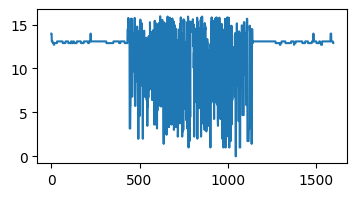

In [17]:
data = np.asarray(im)

line_pixels = data[:][ny // 2]

red = line_pixels[:, 0]
blue = line_pixels[:, 1]
green = line_pixels[:, 2]

intensity = (red**2 + green**2 + blue**2) ** 0.5
plt.figure(figsize=(4, 2))
plt.plot(intensity)

That doesn't look right...

In [18]:
print(data.dtype)

uint8


### Overflow

The datatype `int8` only stores numbers between -128 and 127. 

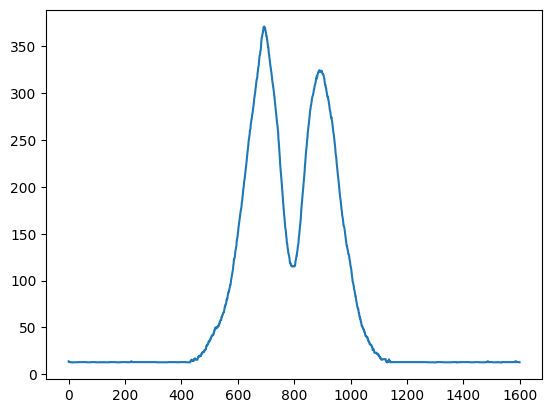

In [19]:
data = np.asarray(im, dtype=np.int32)

line_pixels = data[:][ny // 2]

intensity = (
    line_pixels[:, 0] ** 2 + line_pixels[:, 1] ** 2 + line_pixels[:, 2] ** 2
) ** 0.5
plt.plot(intensity)

# More constructions of numpy arrays

## Python lists and numpy arrays

### From list to array
`array(list, [datatype])` generates a numpy.array from a list:

In [20]:
mylist = [0, 1.2, 4, -9.1, 5, 8]

a = np.array(mylist)

### From array to list

In [21]:
a.tolist()

[0.0, 1.2, 4.0, -9.1, 5.0, 8.0]

## From "anything" to NumPy array

```python
asarray(a)
```

converts "any" object `a` to a NumPy array if possible/necessary, tries to avoid copying.

Works with int's, list's, tuple's, numpy.array's, pil images, ...

In [22]:
im = Image.open("figs/blackhole.jpg")

data = np.asarray(im)
print(data[:2][:2])

[[[11  5  5]
  [11  5  5]
  [11  5  5]
  ...
  [11  5  5]
  [11  5  5]
  [11  5  5]]

 [[11  5  5]
  [11  5  5]
  [11  5  5]
  ...
  [11  5  5]
  [11  5  5]
  [11  5  5]]]


**Another example**: Use asarray to allow flexible arguments in functions:

In [23]:
lst = [1, 2, 3]  # list
a = np.zeros(4)  # array
fl = -4.5  # float


def myfunc(some_sequence):
    a = np.asarray(some_sequence)
    return 3 * a - 5


for input_item in (lst, a, fl):
    print(f"Input: {input_item}, type:{type(input_item)}")
    print(f"Output:  3 * a - 5 ={ myfunc(input_item) } \n")

Input: [1, 2, 3], type:<class 'list'>
Output:  3 * a - 5 =[-2  1  4] 

Input: [0. 0. 0. 0.], type:<class 'numpy.ndarray'>
Output:  3 * a - 5 =[-5. -5. -5. -5.] 

Input: -4.5, type:<class 'float'>
Output:  3 * a - 5 =-18.5 



## Higher-dimensional arrays

Passing a tuple to an array constructor results in a higher-dimensional array:

In [24]:
np.zeros((2, 2, 3))  # 2*3*3 dim. array

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

A two-dimensional array from two one-dimensional Python lists:

In [25]:
x = [0, 0.5, 1]
y = [-6.1, -2, 1.2]  # Python lists
np.array([x, y])  # form array with x and y as rows

array([[ 0. ,  0.5,  1. ],
       [-6.1, -2. ,  1.2]])

Numpy allows up to 32 dimensions. You can retrieve the shape of an array with

In [26]:
a = np.zeros((2, 3, 3))
a.shape

(2, 3, 3)

## Changing array dimensions

Use `reshape` to reinterpret the same data as a new shape *without copying* data:

In [27]:
a = np.array([0, 1.2, 4, -9.1, 5, 2])

In [28]:
b = a.reshape((2, 3))  # turn a into a 2x3 matrix
b

array([[ 0. ,  1.2,  4. ],
       [-9.1,  5. ,  2. ]])

### Array view

The reshaped array points to the same data vector, i.e. no data is copied:

In [29]:
b[0, 0]

0.0

In [30]:
b[0, 0] = -10
print(f"a = {a}")
print(f"b = \n{b}")

a = [-10.    1.2   4.   -9.1   5.    2. ]
b = 
[[-10.    1.2   4. ]
 [ -9.1   5.    2. ]]


## NumPy data ordering

Numpy allows to store array in *C* or *FORTRAN* ordering:

<img src="array_ordering.svg">
**Note**: For one-dimensional arrays, the orders are equivalent.

The order can be chosen with the `order` flag:

In [31]:
a = np.asarray([[1, 2], [3, 4]], order="F")  # Fortran order
a.flags.f_contiguous  # Check if Fortran ordering is used

True

## NumPy data ordering (2)

Numpy automatically converts the ordering when necessary:

In [32]:
A = np.array([[1, 2], [3, 4]], order="C")
B = np.array([[1, 2], [3, 4]], order="F")
print(A + B)

[[2 4]
 [6 8]]


Transposing a matrix is perfomed by swapping the ordering (without data copying):

In [33]:
A.transpose().flags.f_contiguous

True

# Array indexing

The indexing syntax that we are know from lists also work for arrays.

### Getting values
Slicing:
```python
a[1:4]           # Get 2nd to 4th element
```
Fancy indexing:
```python
a[[0, 2, 3]]     # Get entries 0, 2 and 3
```
**Important**: Slicing returns a *view* to the original array, i.e. no data is copied. Fancy indexing always returns a copy of the array.

### Setting values
```python
a[2:4] = -1      # set a[2] and a[3] equal to -1
a[-1]  = a[0]    # set last equal to first element
a[:]   = 0       # set all elements of a equal to 0
```

## Multi-dimensional indexing

Multi-dimensional indexing has the same syntax as with list's:
```python
a = ones([2, 3]) # create a 2x3 matrix 
                 # (two rows, three columns)

a[1,2] = 10      # set element (1,2) (2nd row, 3rd column)
a[1][2] = 10     # equivalent syntax (slower)
a[:,2] = 10      # set all elements in 3rd column
a[1,:] = 10      # set all elements in 2nd row
a[:,:] = 10       # set all elements 
```

## Example: extracting sub-matrices with slicing

Given this matrix:

In [34]:
a = np.linspace(1, 2, 12).reshape(3, 4)
print(a)

[[1.         1.09090909 1.18181818 1.27272727]
 [1.36363636 1.45454545 1.54545455 1.63636364]
 [1.72727273 1.81818182 1.90909091 2.        ]]


we can use slicing to get a *view* of a subset of this matrix.
For example to get the submatrix consisting of row 2 and 3 and every second column, we could use:

In [35]:
a[1:3, ::2] = 0  # a[i,j] for i=1,2 and j=0,2,4
a

array([[1.        , 1.09090909, 1.18181818, 1.27272727],
       [0.        , 1.45454545, 0.        , 1.63636364],
       [0.        , 1.81818182, 0.        , 2.        ]])

## Slices create *views* of array data

Assigning to a sliced array will change the original array:

In [36]:
a = np.ones([3, 2])
b = a[2, :]  # get a view onto the 3rd row
b[0] = np.pi  # assigning to b is reflected in a!
print(a)

[[1.         1.        ]
 [1.         1.        ]
 [3.14159265 1.        ]]


To avoid referencing via slices (if needed) use copy:
```python
b = a[2,:].copy()  # b has its own vector structure
```

**Note**: This behaviour is different to Python `lists`, where `a[:]` makes always a copy

# Loops


## Loops over arrays using indices

If we know the dimension of the array, we can use a nested loop to iterate over all array elements:


In [37]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i, j] = (i + 1) * (j + 1) * (j + 2)
        print(f"a[{i}, {j}] = {a[i, j]}")
    print()  # empty line after each row

a[0, 0] = 2.0
a[0, 1] = 6.0

a[1, 0] = 4.0
a[1, 1] = 12.0

a[2, 0] = 6.0
a[2, 1] = 18.0



* Is there a more *Pythonic* way?
* What if we do not know the dimension of the array?

## Better: Use standard Python loops

A standard for loop iterates over the first index. 

**Example:** Looping over each element in a matrix:
```python
for row in a:
    for element in row:
         my_func(element)
```

## For unknown dimensions loop over the flattened array

View array as one-dimensional and iterate over all elements:
```python
for element in a.ravel():
    my_func(element)
```
ravel() returns a *flattened array*, (1D version). Might return a copy if necessary. 

**Advice**: Use `ravel()` only when reading elements, for assigning it is better to use `shape` or `reshape`.

## Numpy Array computations

## Arithmetic operations

Arithmetic operations can be used with arrays:

In [38]:
import numpy as np

a = np.linspace(0, 10, 11)

b = 3 * a - 1
c = np.sin(b)
d = np.exp(c)

print(b)

[-1.  2.  5.  8. 11. 14. 17. 20. 23. 26. 29.]


**Note**: most arithmetic operations in numpy are performed **elementwise**.

## Array operations are much faster than element-wise operations

Let's compare the array versus element-wise operation on a 10 million large array.

#### Element wise implementation

In [39]:
%%time
import numpy as np

a = np.linspace(0, 1, int(1e07))  # create a large array

b = np.empty_like(a)
for i in range(a.size):
    b[i] = 3 * a[i] - 1

CPU times: user 2.56 s, sys: 6.09 ms, total: 2.57 s
Wall time: 2.57 s


#### Implementation with array operations

In [40]:
%time b = 3 * a - 1

CPU times: user 15 ms, sys: 12.1 ms, total: 27.1 ms
Wall time: 26.3 ms


Array operators are typically faster as they are *vectorized*.

## Vectorization user-defined functions

Imagine you have implemented your own function and would like to apply it to all elements in an array:

In [41]:
a = np.linspace(-1, 1, 1000000)


def myfunc(x):
    if x > 0:
        return 0
    else:
        return x**2


myfunc(a)  # ??

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Problem**: myfunc operates on the entire array instead of elementwise operations.

# Potential solution to vectorization user-defined functions

Loop over each array element and call myfunc 

In [42]:
%%time
out = np.empty(len(a))

for i, ele in np.ndenumerate(a):
    out[i] = myfunc(ele)

CPU times: user 450 ms, sys: 0 ns, total: 450 ms
Wall time: 448 ms


**This is slow**!

# Better solution

Convert myfunc to a *vectorized* function: 

In [43]:
%%time
vfunc = np.vectorize(myfunc)
out2 = vfunc(a)

CPU times: user 165 ms, sys: 16 ms, total: 181 ms
Wall time: 179 ms


**That's faster**! 

# Plotting with matplotlib

Matplotlib is a popular package for creating publication quality figures. The easiest way to use matplotlib is to import the submodule "pyplot".

## Learning resources

* [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib) by Nicolas P. Rougier
* [The Matplotlib Gallery:](http://matplotlib.org/gallery.html)

<center>
<img src="matplotlib_gallery.png" style="width: 800px;"/>
</center>


# A simple plot


Plotting one, or multiple sets of data is done with:

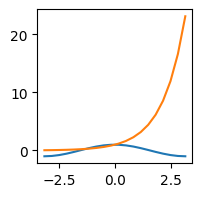

In [44]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-np.pi, np.pi, 20, endpoint=True)
Y = np.cos(X)
Z = np.exp(X)

plt.figure(figsize=(2, 2))

plt.plot(X, Y)
plt.plot(X, Z)

# Adjusting your plot


Typical adjustments:
* Change line color, thickness, type
* Change axis settings
* Add labels, legends
* ...

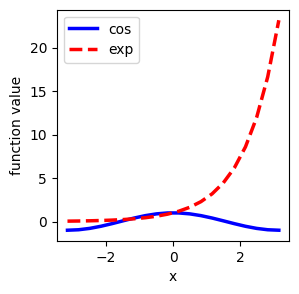

In [45]:
plt.figure(figsize=(3, 3))
plt.plot(
    X, Y, label="cos", color="blue", linewidth=2.5, linestyle="-"
)  # Add labels for the legend
plt.plot(X, Z, label="exp", color="red", linewidth=2.5, linestyle="--")

plt.xlabel("x")  # Add labels for the axis
plt.ylabel("function value")  # Add labels for the axis

plt.legend(loc=0)
plt.savefig("file.pdf")  # save to files for use in papers, etc.

# Other types of plots

|Function name|Plot type|
|--|-------------------------------|
|*pyplot.scatter* |Scatter plot|
|*pyplot.bar* |Bar plot|
|*pyplot.counturf* |Contour plot|
|*pyplot.imshow* |Showing images (on grids)|
|*pyplot.pie* | Pie charts |
|*pyplot.plot_surface* | 3D charts |

## Example of a scatter plot

(-3.141592653589793, 3.141592653589793)

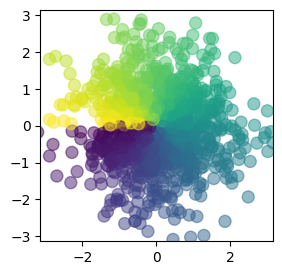

In [50]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.figure(figsize=(3, 3))
plt.scatter(X, Y, s=75, c=T, alpha=0.5)
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])

## Plotting a function of x
To start trying out plotting, let's first define a function to plot:
$$ f(x) = (x - 3) (x - 5) (x - 7) + 85 $$

In [47]:
def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

Next, we plot this function on $  \ x \in [0, 10] $

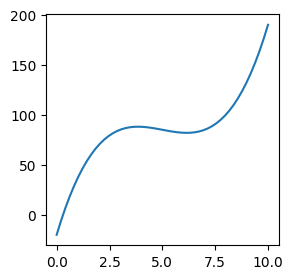

In [51]:
# Calculate plot points:
x = np.linspace(0, 10)

# Evaluate the function at the plot points
y = func(x)

# Plot graph defined by x/y points
plt.figure(figsize=(3, 3))
plt.plot(x, y)